In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import sympy as sym
display.set_matplotlib_formats('svg')

C:\Users\Pablo\AppData\Local\Temp\ipykernel_20156\2866649856.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


## Dynamic Learning Rate

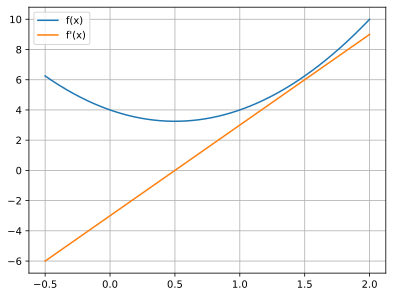

In [3]:
fx = lambda x: 3*x**2 - 3*x + 4
dx = lambda x: 6*x - 3

x = np.linspace(-.5, 2, 2001)

plt.plot(x, fx(x), label='f(x)')
plt.plot(x, dx(x), label="f'(x)")
plt.grid()
plt.legend(['f(x)', "f'(x)"])
plt.show()

In [21]:
# random starting point
local_min = np.random.choice(x, 1)[0] # select a random point from the x vector
local_min1 = local_min
local_min2 = local_min
local_min3 = local_min

learning_rate = 0.01
train_epochs = 100

modelparametersFix = np.zeros((train_epochs, 3))
modelparametersEpoch = np.zeros((train_epochs, 3))
modelparametersGrad = np.zeros((train_epochs, 3))

for i in range(train_epochs):
    # compute gradient
    gradient1 = dx(local_min1)
    gradient2 = dx(local_min2)
    gradient3 = dx(local_min3)

    # learning rate
    lr1 = learning_rate # non-adaptive learning rate
    lr2 = learning_rate * (1 - i / train_epochs) # adaptive learning rate based on epoch number
    lr3 = learning_rate * np.abs(gradient3) # adaptive learning rate based on gradient magnitude

    # update parameters
    local_min1 = local_min1 - lr1 * gradient1
    local_min2 = local_min2 - lr2 * gradient2
    local_min3 = local_min3 - lr3 * gradient3

    # store the parameters
    modelparametersFix[i] = local_min1, gradient1, lr1
    modelparametersEpoch[i] = local_min2, gradient2, lr2
    modelparametersGrad[i] = local_min3, gradient3, lr3

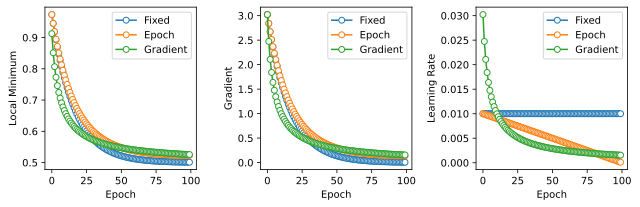

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3))

for i in range(3):
    ax[i].plot(modelparametersFix[:, i], "o-", markerfacecolor="w")
    ax[i].plot(modelparametersEpoch[:, i], "o-", markerfacecolor="w")
    ax[i].plot(modelparametersGrad[:, i], "o-", markerfacecolor="w")
    ax[i].legend(['Fixed', 'Epoch', 'Gradient'])
    ax[i].set_xlabel("Epoch")

ax[0].set_ylabel("Local Minimum")
ax[1].set_ylabel("Gradient")
ax[2].set_ylabel("Learning Rate")

plt.tight_layout()
plt.show()

The most used one is the derivative-based adaptive learning rate (lr3) because it adjusts 
the learning rate based on the magnitude of the gradient, allowing for faster convergence 
when the gradient is large and slower convergence when the gradient is small, which can help
 avoid overshooting the minimum.

 This method is incorportated in many optimizers like Adam, RMSProp, etc. It can be more 
 effective than a fixed learning rate (lr1) or an epoch-based adaptive learning rate (lr2)
  because it directly responds to the behavior of the loss function, rather than relying 
  on a predetermined schedule.